# 3. 평가

## F1 스코어 = 2 / { (1 / recall) + (1 / precision) }
* 정밀도와 재현율을 결합한 지표
* 정밀도와 재현율이 어느쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
* f1_score() 함수 사용

#### EDA

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# na 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df

# ML에 불필요한 변수 제거
def drop(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 한 번에 수행
def transform_features(df):
    df = fillna(df)
    df = drop(df)
    df = format_features(df)
    return df

titanic_df = pd.read_csv('C:/Users/dbswj/OneDrive/바탕 화면/train.csv')
y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis = 1)
X = transform_features(X)     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### F1_score()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

f1_score(y_test, pred)

0.7571428571428571

## ROC 곡선과 AUC

### ROC 곡선
* FPR(False Positive Rate)가 변할 때(X축), TPR(True Positive Rate)가 어떻게 변하는지를(Y축) 나타내는 곡선
* FPR = FP / (FP + TN)
* 임곗값이 1이면 FP 값이 0이 되므로 FPR이 0
* 임곗값이 0이면 TN 값이 0이 되므로 FPR이 1
* 따라서, 임곗값을 0부터 1까지 변화 >> FPR값이 0부터 1까지 변화 >> 변화에 따른 TPR 값 구하기.

### roc_curve()
1. 입력 파라미터
 * y_true : 실제 클래스 값 array
 * y_score : predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률
2. 반환 값
 * fpr
 * tpr
 * thresholds

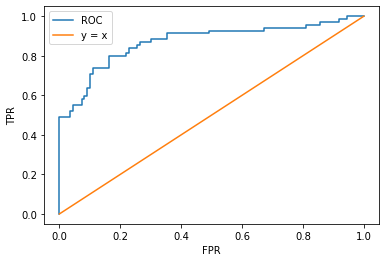

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

pred_prob = lr.predict_proba(X_test)[:,1].reshape(-1,1)

fprs, tprs, thresholds = roc_curve(y_test, pred_prob)
plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1],[0,1], label = 'y = x')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### AUC (Area under curve)
* ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치.

#### roc_auc_score()

In [37]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, pred_prob)
auc

0.8706192358366271